In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("train.csv",parse_dates=["date"])

In [11]:
test = pd.read_csv('test.csv', parse_dates=['date'])

In [9]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
train.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [16]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


OverflowError: cannot convert float infinity to integer

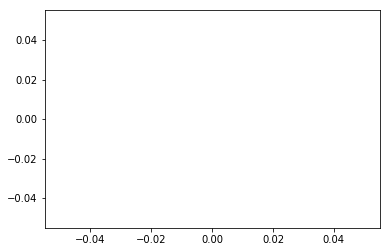

# Proprecessing

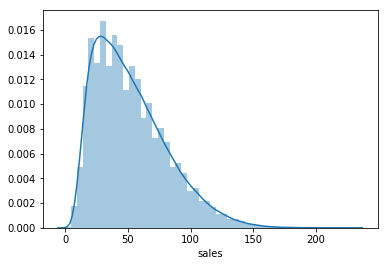

In [212]:
sns.distplot(train['sales'])

# Best selling item 

In [32]:
sort_seling = train.sort_values('sales',ascending=False)

In [34]:
sort_seling.head()

,date,store,item,sales
259109,2017-07-02,2,15,231
386579,2016-07-17,2,22,214
222596,2017-07-09,2,13,210
258759,2016-07-17,2,15,209
313889,2017-07-02,2,18,208


# PreProcessing

In [47]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek

In [182]:
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['dayofweek'] = test['date'].dt.dayofweek

In [49]:
train["year_month"] = train["date"].dt.year.astype('str') + '-'  + train["date"].dt.month.astype('str')

In [51]:
train.head()

,date,store,item,sales,year,month,day,dayofweek,year_month
0,2013-01-01,1,1,13,2013,1,1,1,2013-1
1,2013-01-02,1,1,11,2013,1,2,2,2013-1
2,2013-01-03,1,1,14,2013,1,3,3,2013-1
3,2013-01-04,1,1,13,2013,1,4,4,2013-1
4,2013-01-05,1,1,10,2013,1,5,5,2013-1


In [56]:
sort_train = train.sort_values(['date','store'])

In [106]:
store1= sort_train.loc[train['store']==1,]

In [107]:
store1.head()

,date,store,item,sales,year,month,day,dayofweek,year_month
0,2013-01-01,1,1,13,2013,1,1,1,2013-1
18260,2013-01-01,1,2,33,2013,1,1,1,2013-1
36520,2013-01-01,1,3,15,2013,1,1,1,2013-1
54780,2013-01-01,1,4,10,2013,1,1,1,2013-1
73040,2013-01-01,1,5,11,2013,1,1,1,2013-1


In [110]:
store1 = stroe1.groupby(['date'])['sales'].sum()

In [114]:
store1 = store1.to_frame().reset_index()

In [120]:
store1['dayofweek'] = store1['date'].dt.dayofweek

In [127]:
store1 = store1.to_frame().reset_index()
store1['dayofweek'] = store1['date'].dt.dayofweek
store1['year'] = store1['date'].dt.year
store1['month'] = store1['date'].dt.month
store1['day'] = store['date'].dt.day

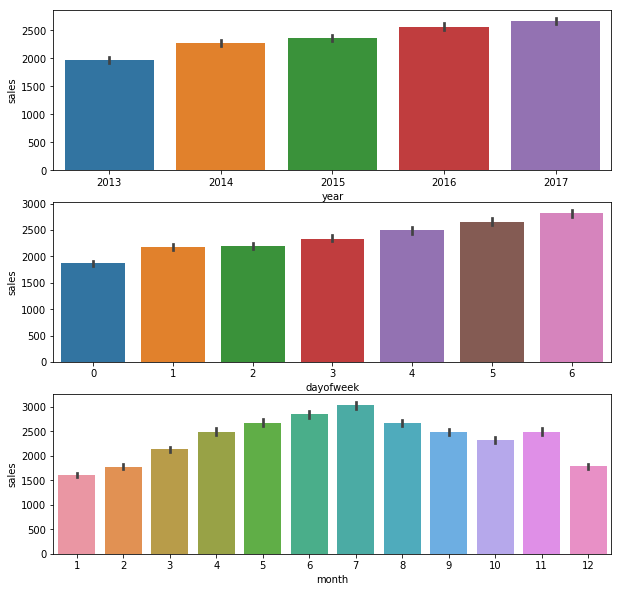

In [142]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(10,10)
sns.barplot(store1['year'],store1['sales'],ax=ax1)
sns.barplot(store1['dayofweek'],store1['sales'],ax=ax2)
sns.barplot(store1['month'], store1['sales'],ax=ax3)

### Store=1 매년 성장세 보이고 있다. 월 -> 일로 갈수록 판매증가. , 여름시즌에 판매량이 많다.

In [146]:
def find_store(store_num):
    store= sort_train.loc[train['store']==store_num,]
    store= store.groupby(['date'])['sales'].sum()
    store = store.to_frame().reset_index()
    store['dayofweek'] = store1['date'].dt.dayofweek
    store['year'] = store1['date'].dt.year
    store['month'] = store1['date'].dt.month
    store['day'] = store['date'].dt.day
    return store
    

In [154]:
store3 = find_store(5)

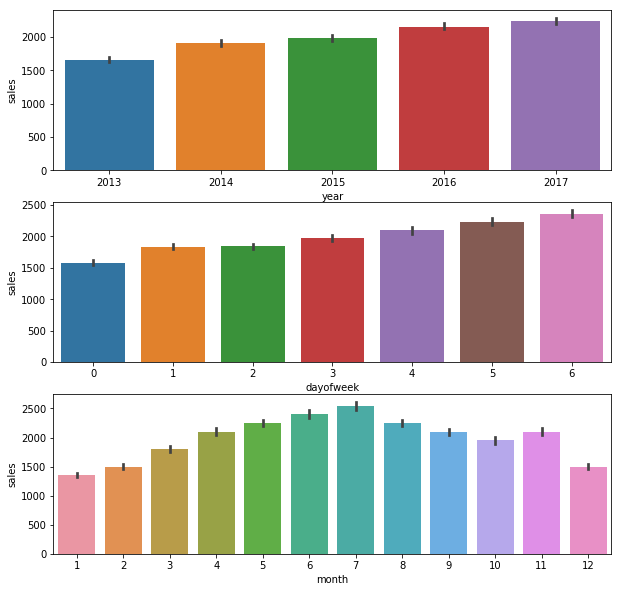

In [155]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1)
figure.set_size_inches(10,10)
sns.barplot(store3['year'],store3['sales'],ax=ax1)
sns.barplot(store3['dayofweek'],store3['sales'],ax=ax2)
sns.barplot(store3['month'], store3['sales'],ax=ax3)

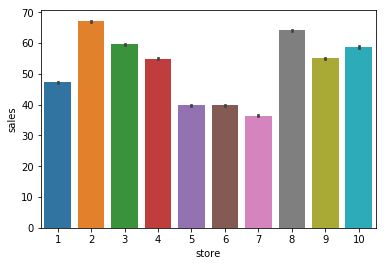

In [158]:
sns.barplot(train['store'],train['sales'])

### Store 유효한 Feature로 작용

In [164]:
item = train.groupby('item')['sales'].sum().reset_index()

In [167]:
item = item.sort_values('sales',ascending=False)

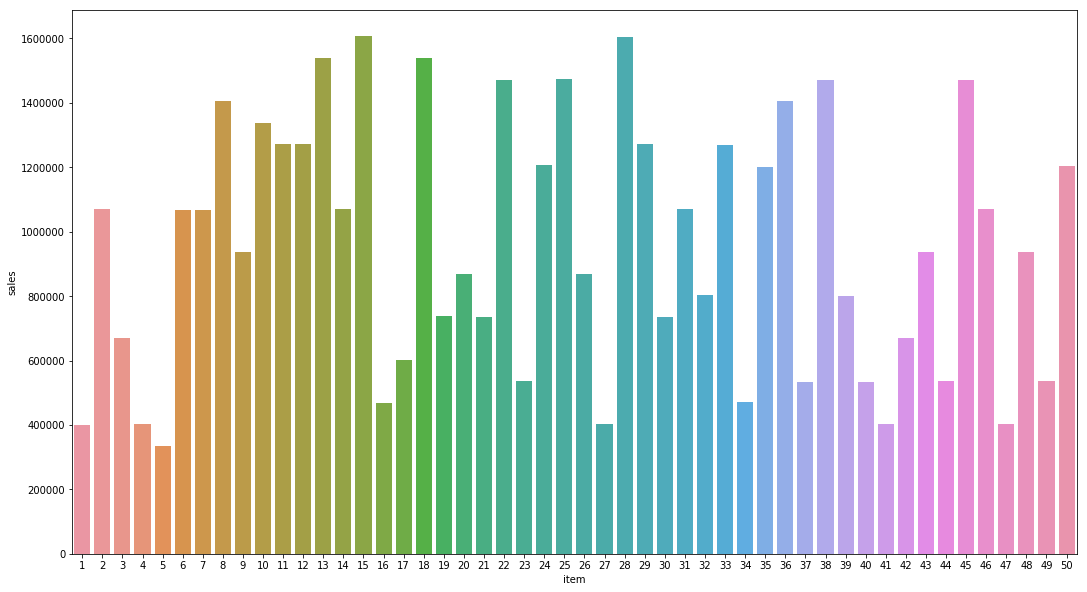

In [175]:
plt.figure(figsize=(18,10))
sns.barplot(item['item'],item['sales'])

In [201]:
x_test = test[['store','item','month','dayofweek']]

In [189]:
y_train = train['sales']

In [191]:
x_train = train[['store','item','month','dayofweek']]

In [196]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
model= RandomForestRegressor()

In [199]:
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [203]:
prediction = model.predict(x_test)

In [205]:
submission = pd.read_csv('sample_submission.csv')

In [208]:
submission['sales'] = prediction

In [209]:
submission.to_csv('baseline.csv')